In [1]:
import os
import numpy as np
import pandas as pd
import collections 
import re
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sentence_transformers import SentenceTransformer

C:\Users\Sidhant Saxena\AppData\Local\Programs\Python\Python312\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
def clean_text(text,keep_stop_words):
    lemmatizer = WordNetLemmatizer()
    if keep_stop_words:
        stop_words = ()
    else:
        stop_words = ('a', 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'b', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', 'came', 'can',  'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes',  'consequently', 'consider', 'considering', 'corresponding', 'could', 'course', 'currently', 'd', 'definitely', 'described', 'despite', 'did', 'different', 'do', 'does', 'doing', 'done', 'down', 'downwards', 'during', 'e', 'each', 'edu', 'eg', 'eight', 'either', 'else', 'elsewhere', 'enough', 'entirely', 'especially', 'et', 'etc', 'even', 'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'ex', 'exactly', 'example', 'except', 'f', 'fifth', 'first', 'five', 'followed', 'following', 'follows', 'for', 'former', 'formerly', 'forth', 'four', 'from', 'further', 'furthermore', 'g', 'get', 'gets', 'getting', 'given', 'gives', 'go', 'goes', 'going', 'gone', 'got', 'gotten', 'h', 'had', 'happens', 'hardly', 'has', 'have', 'having', 'he', 'hello', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'hi', 'him', 'himself', 'his', 'hither', 'hopefully', 'how', 'howbeit', 'however', 'i', 'ie', 'if',  'immediate', 'in', 'inasmuch', 'inc', 'indeed', 'indicate', 'indicated', 'indicates', 'inner', 'insofar', 'instead', 'into', 'inward', 'is', 'it', 'its', 'itself', 'j', 'just', 'k', 'keep', 'keeps', 'kept', 'know', 'knows', 'known', 'l', 'last', 'lately', 'later', 'latter', 'latterly', 'least', 'less', 'lest', 'let', 'like', 'liked', 'likely', 'little', 'look', 'looking', 'looks', 'ltd', 'm', 'mainly', 'many', 'may', 'maybe', 'me', 'mean', 'meanwhile', 'merely', 'might', 'more', 'moreover', 'most', 'mostly', 'much', 'must', 'my', 'myself', 'n', 'name', 'namely', 'nd', 'near', 'nearly', 'need', 'needs', 'neither','nevertheless', 'new', 'next', 'nine',  'nobody', 'non', 'none', 'noone', 'nor', 'normally',  'novel', 'now', 'nowhere', 'o', 'obviously', 'of', 'off', 'often', 'oh', 'ok', 'okay', 'on', 'once', 'one', 'ones', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'ought', 'our', 'ours', 'ourselves', 'out', 'outside', 'over', 'overall', 'own', 'p', 'particular', 'particularly', 'per', 'perhaps', 'placed', 'please', 'plus', 'possible', 'presumably', 'probably', 'provides', 'q', 'que', 'quite', 'qv', 'r', 'rather', 'rd', 're', 'really', 'regarding', 'regardless', 'regards', 'relatively', 'respectively', 'right', 's', 'said', 'same', 'saw', 'say', 'saying', 'says', 'second', 'secondly', 'see', 'seeing', 'seem', 'seemed', 'seeming', 'seems', 'seen', 'self', 'selves', 'sensible', 'sent', 'seven', 'several', 'shall', 'she', 'should', 'since', 'six', 'so', 'some', 'somebody', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhat', 'somewhere', 'soon', 'sorry', 'specified', 'specify', 'specifying', 'still', 'sub', 'such', 'sup', 'sure', 't', 'take', 'taken', 'tell', 'tends', 'th', 'than', 'thanx', 'that', 'thats', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'therefore', 'therein', 'theres', 'thereupon', 'these', 'they', 'think', 'third', 'this', 'thorough', 'thoroughly', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'took', 'toward', 'towards', 'tried', 'tries', 'truly', 'try', 'trying', 'twice', 'two', 'u', 'un', 'under',  'unless', 'until', 'unto', 'up', 'upon', 'us', 'use', 'uses', 'using', 'usually', 'uucp', 'v', 'value', 'various', 'very', 'via', 'viz', 'vs', 'w', 'want', 'wants', 'was', 'way', 'we', 'welcome', 'well', 'went', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'willing', 'wish', 'with', 'within', 'without', 'wonder', 'would', 'would', 'x', 'y', 'yes', 'yet', 'you', 'your', 'yours', 'yourself', 'yourselves', 'z', 'zero')
    text = text.lower()
    text = re.sub(r"[\[\]\(\)\{\}.,\?]", "", text)  # Remove punctuation
    text = text.strip()
    words = text.split()  

    imp_word = []
    for word in words:
        if word.isalpha() and word not in stop_words:  # Check if word is alphabetical 
            lemm_word = lemmatizer.lemmatize(word)
            for type_w in ['n', 'v', 'a', 'r']:  # Explicitly lemmatizing noun, verbs, adjectives, adverbs
                lemm_word = lemmatizer.lemmatize(lemm_word, pos=type_w)
            imp_word.append(lemm_word)

    text_imp = ' '.join(imp_word)
    return text_imp


In [3]:
df = pd.read_parquet('df_tfidf_uni_embeddings.parquet')

In [4]:
df['tfidf_text'] = df['text'].apply(lambda x: clean_text(x, keep_stop_words=False)) 
df.head()

,text,stars,tfidf_u,tfidf_text
0,I LOVE Weaver's Way and really disagree with s...,5.0,"[0.2483994072909863, 0.09577188411731756, -0.1...",love disagree content previous review ww not n...
1,This is the first time I tried this place and ...,4.0,"[0.17864710208488116, -0.07354659696943655, -0...",time place surprisingly surprise combination d...
2,"I took the beginning class there, and I loved ...",5.0,"[0.16349737687808957, 0.009734678542089707, -0...",begin class love perfectly pace move difficult...
3,Came in after attending the Zurich Classic gol...,4.0,"[0.13161149183151524, -0.07641176999264747, -0...",attend zurich classic golf tournament warm bit...
4,I've been wanting to try Trust Me BBQ for over...,2.0,"[0.2546481380265993, -0.07666130121842499, 0.1...",want trust bbq year stop month ago wait line m...


In [5]:
def tfidf_embedding(df, ngram_range, max_features,col_nm):
    vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features)
    X = vectorizer.fit_transform(df['tfidf_text'])
    return X

In [6]:
from sklearn.decomposition import TruncatedSVD
def compute_explained_variance(X, n_components_range):
    explained_variances = []
    for n in n_components_range:
        svd = TruncatedSVD(n_components=n)
        svd.fit(X)
        explained_variances.append(np.sum(svd.explained_variance_ratio_))
    plt.figure(figsize=(10, 6))
    plt.plot(n_components_range, explained_variances, marker='o')
    plt.xlabel("Number of Components")
    plt.ylabel("Cumulative Explained Variance Ratio")
    plt.title("Explained Variance Ratio for Various Number of Components")
    plt.axhline(y=0.9, color='r', linestyle='--', label="90% threshold") 
    plt.legend()
    plt.show()

    return explained_variances

In [7]:
X = tfidf_embedding(df,(1, 1),1500,'tfidf_u')

In [8]:
X=X.toarray()
cov_mat = np.cov(X.T)
cov_mat

array([[ 2.79311260e-04,  1.33449288e-05, -2.35466732e-07, ...,
        -8.11247089e-07, -1.40582828e-06, -1.57666901e-06],
       [ 1.33449288e-05,  7.57659430e-04, -3.54653220e-07, ...,
         1.84273505e-06,  2.84472788e-07, -4.97067005e-06],
       [-2.35466732e-07, -3.54653220e-07,  3.57332250e-04, ...,
        -1.45841708e-06, -2.50739071e-07, -3.61268356e-07],
       ...,
       [-8.11247089e-07,  1.84273505e-06, -1.45841708e-06, ...,
         5.90949989e-04,  2.56731775e-07, -2.27901385e-06],
       [-1.40582828e-06,  2.84472788e-07, -2.50739071e-07, ...,
         2.56731775e-07,  5.51858172e-04, -4.20315471e-06],
       [-1.57666901e-06, -4.97067005e-06, -3.61268356e-07, ...,
        -2.27901385e-06, -4.20315471e-06,  3.75993095e-04]])

In [9]:
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

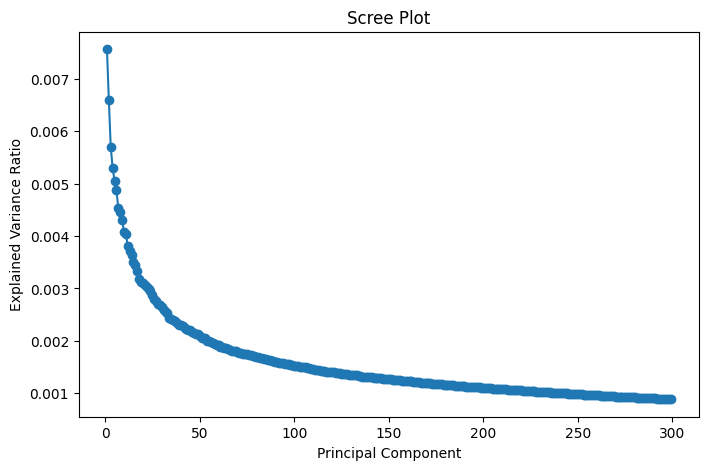

In [10]:
# Scree Plot
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
plt.figure(figsize=(8, 5))
plt.plot(range(1,300), explained_variance_ratio[1:300], 'o-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

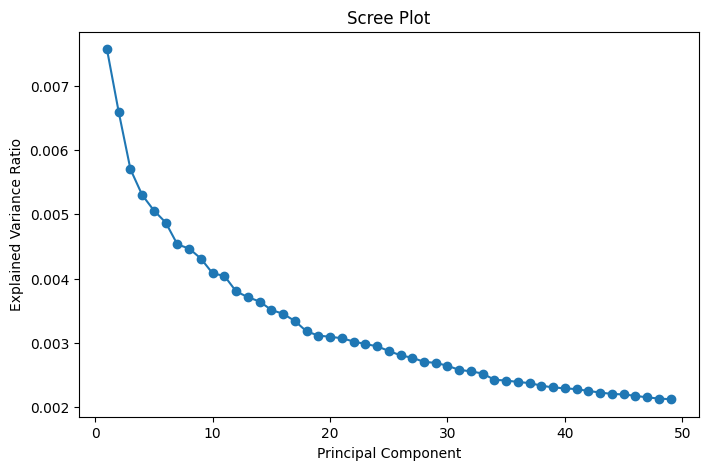

In [11]:
# Scree Plot
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
plt.figure(figsize=(8, 5))
plt.plot(range(1,50), explained_variance_ratio[1:50], 'o-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

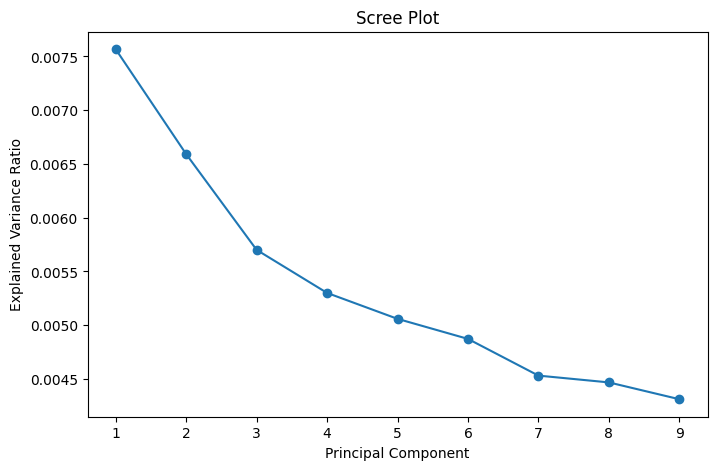

In [12]:
# Scree Plot
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
plt.figure(figsize=(8, 5))
plt.plot(range(1,10), explained_variance_ratio[1:10], 'o-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [13]:
X = normalize(X)
pca = PCA(n_components=50) 
X_pca = pca.fit_transform(X)

In [14]:
X_pca

array([[-0.07980524, -0.13526409, -0.03712423, ...,  0.02271059,
         0.10463021,  0.10356512],
       [ 0.06874424, -0.03989248, -0.0451389 , ..., -0.0255961 ,
        -0.01710122, -0.00077816],
       [-0.01973499, -0.12830269, -0.02935693, ..., -0.00537278,
        -0.15900691, -0.05335366],
       ...,
       [-0.11137404,  0.01882581, -0.05516258, ...,  0.05532337,
        -0.04084121, -0.03315138],
       [-0.15223641,  0.00927904, -0.05414886, ...,  0.05469152,
        -0.03824354,  0.05597439],
       [ 0.0075535 , -0.13250169, -0.01097565, ...,  0.05170374,
         0.00433632, -0.01358119]])

In [15]:
df['tfidf_u']=list(X_pca)

In [16]:
df.drop(['tfidf_text'],axis=1,inplace=True)

In [17]:
df.to_parquet("df_tfidf_uni_embeddings_f.parquet",index=False)